# World Happiness Report 2019 Analysis 

## Read in Data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
%matplotlib inline

In [2]:
happy = pd.read_csv('2019.csv')
happy.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
Overall rank                    156 non-null int64
Country or region               156 non-null object
Score                           156 non-null float64
GDP per capita                  156 non-null float64
Social support                  156 non-null float64
Healthy life expectancy         156 non-null float64
Freedom to make life choices    156 non-null float64
Generosity                      156 non-null float64
Perceptions of corruption       156 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


## Checking for null values 

In [4]:
happy.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

## Dropping unnecessary features 

In [5]:
happy.drop(['Overall rank','Country or region'],axis = 1, inplace = True)
happy.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## Split into test and train sets 

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
features = happy.drop('Score',axis = 1)
labels = happy['Score']
labels = labels.astype('int')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 42)
features.shape

(156, 6)

In [9]:
for dataset in [y_train, y_test]:
    print(round(len(dataset)/len(labels),2))

0.79
0.21


## Performing Linear Regression 

In [10]:
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
print(regr.coef_)

[0.97265555 1.07880072 0.76058898 1.79067482 0.4254186  0.75631793]


In [13]:
print('Mean squared Error :',np.mean((regr.predict(X_test) - y_test)**2))

Mean squared Error : 0.3592851020311444


In [14]:
print('R2 score: ', regr.score(X_test, y_test))

R2 score:  0.6890042734743096


## Variance Treshold 

In [15]:
from sklearn.feature_selection import VarianceThreshold
threshold_n=0.8
sel = VarianceThreshold(threshold=(threshold_n* (1 - threshold_n) ))
sel_var=sel.fit_transform(happy)
happy[happy.columns[sel.get_support(indices=True)]]

,Score
0,7.769
1,7.600
2,7.554
3,7.494
4,7.488
...,...
151,3.334
152,3.231
153,3.203
154,3.083


In [16]:
regr = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size= 0.3)
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
print(regr.coef_)

[1.00036647 1.26615489 0.75819194 1.32611172 1.27846373 0.5914216 ]


In [18]:
print('Mean squared Error :',np.mean((regr.predict(X_test) - y_test)**2))

Mean squared Error : 0.31632009711410924


In [19]:
print('R2 score: ', regr.score(X_test, y_test))

R2 score:  0.7744509055761565


The R2 score has improved after performing variance treshold.

## Recursive Feature Elimination 

In [20]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

In [21]:
digits = load_digits()
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=1)

In [22]:
rfe.fit(features,labels)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=1, step=1, verbose=0)

In [23]:
regr = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3)
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
print(regr.coef_)

[0.90890764 1.02407016 1.13958718 1.14212818 0.99755386 1.15490679]


In [25]:
features1 = {'GDP per capita':regr.coef_[0],
            'Social Support':regr.coef_[1],
            'Healthy Life Expectancy':regr.coef_[2],
            'Freedom to make life choices':regr.coef_[3],
            'Generosity':regr.coef_[4],
            'Perceptions of corruption':regr.coef_[5]}

In [26]:
i=0
while i<6:
    for key,value in features1.items():
        print('The feature {} has a regression coefficient of {}.'.format(key,round(value,2)))
        i=i+1

The feature GDP per capita has a regression coefficient of 0.91.
The feature Social Support has a regression coefficient of 1.02.
The feature Healthy Life Expectancy has a regression coefficient of 1.14.
The feature Freedom to make life choices has a regression coefficient of 1.14.
The feature Generosity has a regression coefficient of 1.0.
The feature Perceptions of corruption has a regression coefficient of 1.15.


In [27]:
print('Mean squared Error :',np.mean((regr.predict(X_test) - y_test)**2))

Mean squared Error : 0.3241557112335574


In [28]:
R2 = regr.score(X_test, y_test)
print('R2 score: ', R2)
R2 = round(R2,2)

R2 score:  0.7529123650397073


In [29]:
print('The R2 score of {} shows that {}% of the variation in Happiness score can be explained by the 6 parameters'.format(R2,(R2*100)))

The R2 score of 0.75 shows that 75.0% of the variation in Happiness score can be explained by the 6 parameters


## Graphical Analysis

Text(0.5, 1.0, 'Distribution of Happiness Score')

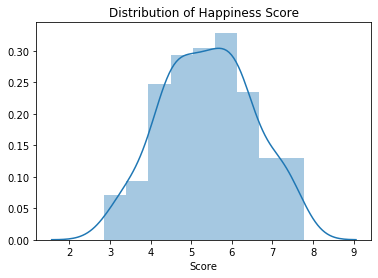

In [30]:
sns.distplot(happy['Score'])
plt.title('Distribution of Happiness Score')

## Correlation Analysis 

In [31]:
corrmatrix = happy.corr()

In [32]:
print(corrmatrix)

                                 Score  GDP per capita  Social support  \
Score                         1.000000        0.793883        0.777058   
GDP per capita                0.793883        1.000000        0.754906   
Social support                0.777058        0.754906        1.000000   
Healthy life expectancy       0.779883        0.835462        0.719009   
Freedom to make life choices  0.566742        0.379079        0.447333   
Generosity                    0.075824       -0.079662       -0.048126   
Perceptions of corruption     0.385613        0.298920        0.181899   

                              Healthy life expectancy  \
Score                                        0.779883   
GDP per capita                               0.835462   
Social support                               0.719009   
Healthy life expectancy                      1.000000   
Freedom to make life choices                 0.390395   
Generosity                                  -0.029511   
Percepti

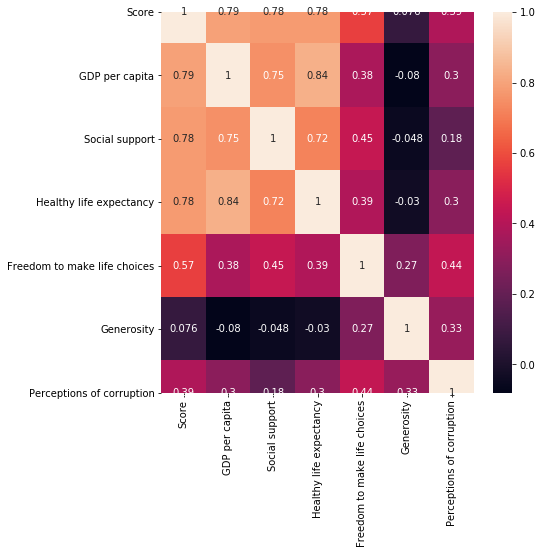

In [33]:
plt.figure(figsize=(7,7))
sns.heatmap(corrmatrix,annot = True)
plt.show()

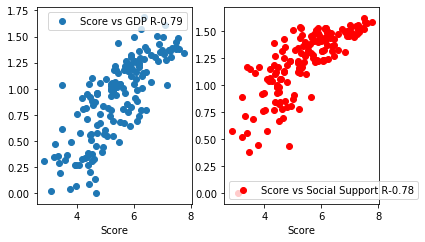

In [34]:
plt.subplot(1,2,1)
plt.scatter(happy['Score'],happy['GDP per capita'],label = 'Score vs GDP R-0.79')
plt.xlabel('Score')
plt.legend()
plt. tight_layout(pad=3.0)
plt.subplot(1,2,2)
plt.scatter(happy['Score'],happy['Social support'],label = 'Score vs Social Support R-0.78',c='r')
plt.xlabel('Score')
plt.legend()

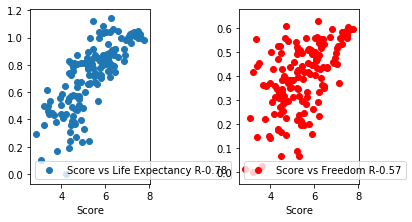

In [35]:
plt.subplot(1,2,1)
plt.scatter(happy['Score'],happy['Healthy life expectancy'],label = 'Score vs Life Expectancy R-0.78')
plt.xlabel('Score')
plt.legend()
plt. tight_layout(pad=4.0)
plt.subplot(1,2,2)
plt.scatter(happy['Score'],happy['Freedom to make life choices'],label = 'Score vs Freedom R-0.57',c='r')
plt.xlabel('Score')
plt.legend()

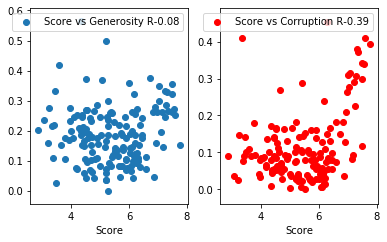

In [36]:
plt.subplot(1,2,1)
plt.scatter(happy['Score'],happy['Generosity'],label = 'Score vs Generosity R-0.08')
plt.xlabel('Score')
plt.legend()
plt. tight_layout(pad=3.0)
plt.subplot(1,2,2)
plt.scatter(happy['Score'],happy['Perceptions of corruption'],label = 'Score vs Corruption R-0.39',c='r')
plt.xlabel('Score')
plt.legend()

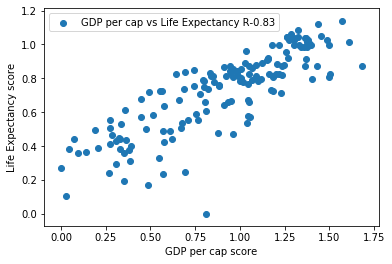

In [37]:
plt.scatter(happy['GDP per capita'],happy['Healthy life expectancy'],label = 'GDP per cap vs Life Expectancy R-0.83')
plt.xlabel('GDP per cap score')
plt.ylabel('Life Expectancy score')
plt.legend()

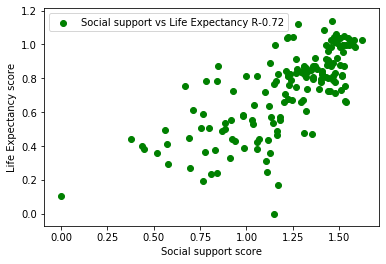

In [38]:
plt.scatter(happy['Social support'],happy['Healthy life expectancy'],label = 'Social support vs Life Expectancy R-0.72',c='g')
plt.xlabel('Social support score')
plt.ylabel('Life Expectancy score')
plt.legend()

## Support Vector Regression 

### Feature Scaling 

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
y_train = y_train.values.reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_train)
y = sc_y.fit_transform(y_train)

### Fitting SVR model to dataset

In [41]:
from sklearn.svm import SVR

In [42]:
regressor = SVR()
regressor.fit(X,y)

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [43]:
y_pred = regressor.predict(X_test)
y_pred

array([1.31100705, 1.1195703 , 1.15174538, 0.88365398, 1.13864311,
       1.08420788, 1.18038161, 1.17354656, 0.95294013, 1.14956134,
       0.53634353, 0.65015541, 0.97886442, 0.84108731, 0.69921638,
       1.29280697, 1.20161468, 1.18924414, 1.16101258, 0.82629759,
       1.08299901, 0.67160534, 1.0558926 , 1.16191178, 0.94017781,
       1.18359807, 1.25961678, 0.88018851, 0.79206164, 1.15185169,
       1.08107113, 1.22069037, 1.14037036, 1.07149849, 1.19232342,
       1.09220475, 1.23666949, 0.75599729, 1.13277949, 1.13644748,
       1.21840205, 1.26792298, 1.03382776, 1.13546781, 1.19999599,
       0.57684501, 1.20126681])

In [44]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

3.9893868891831867